<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Таким образом, **целью исследования** является построение модели, способной с достаточной точностью прогнозировать уход клиентов Бета-банка в ближайшее время.

**Ход работы:**
1. [Изучение и подготовка данных](#preprocessing)
2. [Исследование задачи](#analysis)
3. [Решение проблемы дисбаланса и выбор модели](#solving)
4. [Финальное тестирование модели](#final)

На протяжении исследования будем сравнивать модели, обученные наиболее известными **алгоритмами** - *методом k ближайших соседей (kNN)*, *деревом решений*, *случайным лесом (random forest)* и *логистической регрессией*.

**Ключевые метрики:** F1-мера, AUC-ROC

##  Описание данных
Данные находятся в файле */datasets/Churn.csv* (англ. «отток клиентов»).

**Признаки:**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**
- `Exited` — факт ухода клиента

<a id="preprocessing"></a>
## Подготовка данных

In [1]:
# импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# данные
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Всего в датасете содержится 13 колонок с признаками: 10 из низ относятся к численным, 3 - к категориальным. При этом, признаки, отвечающие за индекс строки в данных (*RowNumber*), уникальный идентификатор клиента (*CustomerID*) и фамилия клиента (*Surname*) могут быть удалены на начальном этапе, поскольку не содержат полезной информации для обучения модели.

In [4]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [5]:
# процент пропусков в столбце
data['Tenure'].isnull().mean()*100

9.09

Пропущенные значения присутствуют только в столбце *Tenure*, содержащем информацию о том, сколько лет человек является клиентом банка. Пропуски затрагивают всего в 9% строк. Игнорировать их нельзя: это может помешать модели сделать корректные выводы, но и удалять тоже не вариант, т.к. это ценные данные. Лучшее решение - попробовать заполнить их медианными значениями. 

In [6]:
print('Медиана:', data['Tenure'].median())
data['Tenure'] = data.fillna(data['Tenure'].median())

Медиана: 5.0


In [7]:
data['Tenure'].isnull().mean()*100

0.0

In [8]:
# приведение к численному типу
data['Tenure'] = data['Tenure'].astype(int)

Что касается оставшихся категориальных столбцов(*Geography* и *Gender*) - воспользуемся техникой прямого кодирования, чтобы перевести их в численные. Но перед этим, разделим датасет на на train, valid, test выборки в соотношении 3:1:1. 

In [9]:
features = data.drop('Exited', axis=1)
target = data['Exited']

# выделение тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=123)

# деление на обучающую и валидационную
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, stratify=target_train, random_state=123)

target_train.shape[0], target_valid.shape[0], target_test.shape[0]

(6000, 2000, 2000)

In [10]:
# one hot encoding
categorical = ['Gender', 'Geography']
enc = OneHotEncoder(sparse=False, drop='first')
enc.fit(features_train[categorical])

# train
encoded_train = pd.DataFrame(enc.transform(features_train[categorical]), index=features_train.index)
features_train = pd.concat([features_train, encoded_train], axis=1)

# valid
encoded_valid = pd.DataFrame(enc.transform(features_valid[categorical]), index=features_valid.index)
features_valid = pd.concat([features_valid, encoded_valid], axis=1)

# test
encoded_test = pd.DataFrame(enc.transform(features_test[categorical]), index=features_test.index)
features_test = pd.concat([features_test, encoded_test], axis=1)

display(features_train.head())
display(features_valid.head())
display(features_test.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
4053,550,Spain,Male,51,550,0.00,2,1,0,153917.41,1.0,0.0,1.0
9797,627,Spain,Male,40,627,0.00,2,1,1,194792.42,1.0,0.0,1.0
4101,673,Spain,Female,57,673,0.00,2,1,1,49684.09,0.0,0.0,1.0
8920,570,France,Female,36,570,0.00,2,1,0,92118.75,0.0,0.0,0.0
2353,554,France,Female,26,554,92606.86,2,1,0,192709.69,0.0,0.0,0.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
2786,511,Germany,Female,40,511,124401.60,1,1,0,198814.24,0.0,1.0,0.0
1474,755,Germany,Female,30,755,154221.37,2,0,1,62688.55,0.0,1.0,0.0
1949,516,France,Female,43,516,112773.73,2,1,1,139366.58,0.0,0.0,0.0
8474,721,Spain,Female,33,721,72535.45,1,1,1,103931.49,0.0,0.0,1.0
9639,761,Spain,Female,32,761,103515.39,2,1,1,177622.38,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
2375,815,Spain,Female,39,815,0.00,1,1,1,85167.88,0.0,0.0,1.0
2821,714,Spain,Female,33,714,103121.33,2,1,1,49672.01,0.0,0.0,1.0
6969,619,Spain,Female,38,619,0.00,2,1,1,117616.29,0.0,0.0,1.0
4748,537,Germany,Female,37,537,158411.95,4,1,1,117690.58,0.0,1.0,0.0
76,664,France,Male,55,664,0.00,2,1,1,139161.64,1.0,0.0,0.0


In [11]:
# переименование новых столбцов
new_names_dict = {0: 'IsMale', 1: 'IsGermany', 2: 'IsSpain'}

features_train = features_train.rename(columns=new_names_dict)
features_valid = features_valid.rename(columns=new_names_dict)
features_valid = features_valid.rename(columns=new_names_dict)

In [12]:
# удаление старых
features_train = features_train.drop(columns=['Gender', 'Geography'])
features_valid = features_valid.drop(columns=['Gender', 'Geography'])
features_test = features_test.drop(columns=['Gender', 'Geography'])

Посмотрим на распределения существующих численных столбцов:

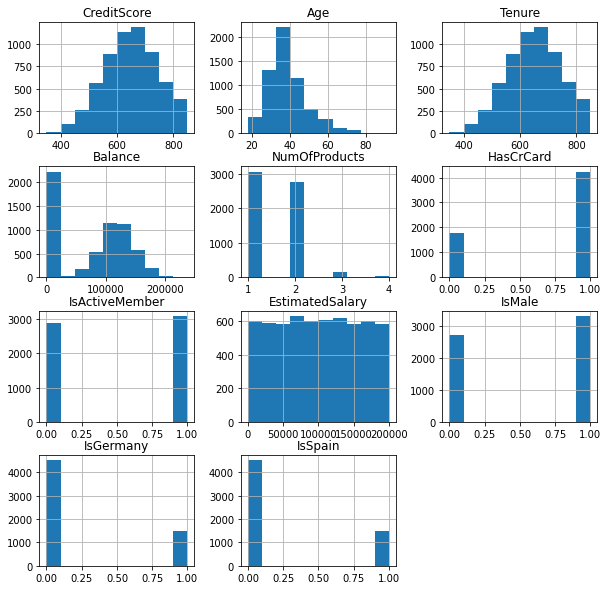

In [13]:
# гистограммы численных признаков
features_train.hist(figsize=(10, 10))
plt.show()

Cреди численных признаков присутствуют 5 бинарных (*HasCrCard*, *IsActiveMember* + столбцы, появившиеся после кодирования признаков) Значения остальных же распределены в различных диапазонах. Чтобы модель не посчитала какой-либо признак более важным только из-за того, что он может принимать гораздо бОльшие значения, чем остальные, масштабируем все небинарные числовые признаки.

In [14]:
# масштабирование
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',  'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверка на дисбаланс целевого признака:

In [15]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Наблюдается сильный дисбаланс в пользу нулевого класса (4:1).

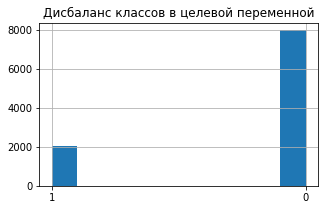

In [16]:
target.astype(str).hist(figsize=(5, 3))
plt.title('Дисбаланс классов в целевой переменной')
plt.show()

<a id="analysis"></a>
## Исследование задачи

Попробуем обучить модели, "игнорируя" дисбаланс классов.

Ключевой гиперпараметр для **kNN** - количество ближайших соседей. Чтобы получить более оптимальное решение, будем варьировать его значение от 1 до 15 с шагом в 2 (т.е. только нечетные значения).

In [18]:
# kNN
best_f1, best_auc_roc = 0, 0
nest_n = 0

for n in range(1, 17, 2):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    probabilities = model.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, predictions)
    auc_roc = roc_auc_score(target_valid, probabilities)
    
    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_n = n

print(f'Лучшее значение F1={round(best_f1, 4)} при n={best_n}. AUC-ROC={round(best_auc_roc, 4)}')

Лучшее значение F1=0.5593 при n=7. AUC-ROC=0.8015


Ключевым гиперпараметром **дерева решений** является максимальная глубина дерева. Для **случайного леса** важным также является нахождение оптимального количества деревьев в ансамбле.

In [19]:
# дерево решений
best_f1, best_auc_roc = 0, 0
best_depth = 0

for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    probabilities = model.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, predictions)
    auc_roc = roc_auc_score(target_valid, probabilities)
    
    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth

print(f'Лучшее значение F1={round(best_f1, 4)} при depth={best_depth}. AUC-ROC={round(best_auc_roc, 4)}')

Лучшее значение F1=0.5615 при depth=5. AUC-ROC=0.8192


In [20]:
%%time

# Random Forest
best_f1, best_auc_roc = 0, 0
best_depth, best_n = 0, 0

for n in range(5, 105, 5):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=123)
        model.fit(features_train, target_train)
    
        predictions = model.predict(features_valid)
        probabilities = model.predict_proba(features_valid)[:, 1]
    
        f1 = f1_score(target_valid, predictions)
        auc_roc = roc_auc_score(target_valid, probabilities)
    
        if f1 > best_f1:
            best_f1 = f1
            best_auc_roc = auc_roc
            best_depth = depth
            best_n = n
    
print(f'Лучшее значение F1={round(best_f1, 4)} при depth={best_depth} и n_деревьев={best_n}. AUC-ROC={round(best_auc_roc, 4)}')

Лучшее значение F1=0.5745 при depth=12 и n_деревьев=25. AUC-ROC=0.843
CPU times: user 1min 41s, sys: 866 ms, total: 1min 41s
Wall time: 1min 42s


Самый лучший результат показала модель, обученная алгоритмом случайного леса. Даже без учета существующего дисбаланса классов удалось достигнуть значения F1-меры > 0.5.  При этом, значения AUC-ROC в каждом из случаев выше значений F1-меры примерно в 2 раза. Вероятно, это связано с меньшей чувствительностью AUC-ROC к дисбалансу. 

<a id="solving"></a>
## Борьба с дисбалансом

Существует 2 основных **метода борьбы с дисбалансом**:
1. Увеличение выборки положительного класса
2. Уменьшение выборки отрицательного класса

In [21]:
# для увеличения выборки положит.класса
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

In [22]:
# для уменьшения выборки отриц.класса
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=123)
    
    return features_downsampled, target_downsampled

Существующее соотношение классов 4:1. Для того, чтобы "выровнять" его, можно либо увеличить выборку положительного класса в 4 раза, либо уменьшить выборку отрицательного во столько же раз. Применим оба метода борьбы с дисбалансом к ранее обозначенным моделям, чтобы выбрать более подходящий.

In [ ]:
# upsampling
up_features_train, up_target_train = upsample(features_train, target_train, 4)

# downsampling
down_features_train, down_target_train = downsample(features_train, target_train, 0.25)

In [ ]:
# kNN
upsample_dict = {'features': up_features_train, 'target': up_target_train, 'best_f1': 0, 'best_auc_roc': 0, 'best_n': 0}
downsample_dict = {'features': down_features_train, 'target': down_target_train, 'best_f1': 0, 'best_auc_roc': 0, 'best_n': 0}

for dictionary in [upsample_dict, downsample_dict]:
    for n in range(1, 17, 2):
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(dictionary['features'], dictionary['target'])
    
        predictions = model.predict(features_valid)
        probabilities = model.predict_proba(features_valid)[:, 1]
    
        f1 = f1_score(target_valid, predictions)
        auc_roc = roc_auc_score(target_valid, probabilities)
    
        if f1 > dictionary['best_f1']:
            dictionary['best_f1'] = f1
            dictionary['best_auc_roc'] = auc_roc
            dictionary['best_n'] = n

print(f"Upsampling: F1={round(upsample_dict['best_f1'], 4)} при n={upsample_dict['best_n']}. \
AUC-ROC={round(upsample_dict['best_auc_roc'], 4)}")

print(f"Downsampling: F1={round(downsample_dict['best_f1'], 4)} при n={downsample_dict['best_n']}. \
AUC-ROC={round(downsample_dict['best_auc_roc'], 4)}")

In [ ]:
# дерево решений
upsample_dict = {'features': up_features_train, 'target': up_target_train, 
                 'best_f1': 0, 'best_auc_roc': 0, 'best_depth': 0}

downsample_dict = {'features': down_features_train, 'target': down_target_train, 
                   'best_f1': 0, 'best_auc_roc': 0, 'best_depth': 0}

for dictionary in [upsample_dict, downsample_dict]:
    for depth in range(1, 16, 1):
        model = DecisionTreeClassifier(max_depth=depth, random_state=123)
        model.fit(dictionary['features'], dictionary['target'])
    
        predictions = model.predict(features_valid)
        probabilities = model.predict_proba(features_valid)[:, 1]
    
        f1 = f1_score(target_valid, predictions)
        auc_roc = roc_auc_score(target_valid, probabilities)
    
        if f1 > dictionary['best_f1']:
            dictionary['best_f1'] = f1
            dictionary['best_auc_roc'] = auc_roc
            dictionary['best_depth'] = depth

print(f"Upsampling: F1={round(upsample_dict['best_f1'], 4)} при depth={upsample_dict['best_depth']}. \
AUC-ROC={round(upsample_dict['best_auc_roc'], 4)}")

print(f"Downsampling: F1={round(downsample_dict['best_f1'], 4)} при depth={downsample_dict['best_depth']}. \
AUC-ROC={round(downsample_dict['best_auc_roc'], 4)}")

In [ ]:
%%time

# Random Forest
upsample_dict = {'features': up_features_train, 'target': up_target_train, 
                 'best_f1': 0, 'best_auc_roc': 0, 'best_depth': 0, 'best_n': 0}

downsample_dict = {'features': down_features_train, 'target': down_target_train, 
                   'best_f1': 0, 'best_auc_roc': 0, 'best_depth': 0, 'best_n': 0}

for dictionary in [upsample_dict, downsample_dict]:
    for n in range(5, 105, 5):
        for depth in range(1, 16, 1):
            model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=123)
            model.fit(dictionary['features'], dictionary['target'])
    
            predictions = model.predict(features_valid)
            probabilities = model.predict_proba(features_valid)[:, 1]
    
            f1 = f1_score(target_valid, predictions)
            auc_roc = roc_auc_score(target_valid, probabilities)
    
            if f1 > dictionary['best_f1']:
                dictionary['best_f1'] = f1
                dictionary['best_auc_roc'] = auc_roc
                dictionary['best_depth'] = depth
                dictionary['best_n'] = n

print(f"Upsampling: F1={round(upsample_dict['best_f1'], 4)} при depth={upsample_dict['best_depth']} \
и n_деревьев={upsample_dict['best_n']}. AUC-ROC={round(upsample_dict['best_auc_roc'], 4)}")

print(f"Downsampling: F1={round(downsample_dict['best_f1'], 4)} при depth={downsample_dict['best_depth']} \
и n_деревьев={downsample_dict['best_n']}. AUC-ROC={round(downsample_dict['best_auc_roc'], 4)}")                

In [ ]:
# Logistic Regression
upsample_dict = {'features': up_features_train, 'target': up_target_train, 
                 'best_f1': 0, 'best_auc_roc': 0}

downsample_dict = {'features': down_features_train, 'target': down_target_train, 
                   'best_f1': 0, 'best_auc_roc': 0}

for dictionary in [upsample_dict, downsample_dict]:
    model = LogisticRegression(solver='liblinear', random_state=123)
    model.fit(dictionary['features'], dictionary['target'])

    predictions = model.predict(features_valid)
    probabilities = model.predict_proba(features_valid)[:, 1]

    dictionary['best_f1'] = f1_score(target_valid, predictions)
    dictionary['best_auc_roc'] = roc_auc_score(target_valid, probabilities)

    
print(f"Upsampling: F1={round(upsample_dict['best_f1'], 4)}, AUC-ROC={round(upsample_dict['best_auc_roc'], 4)}")
print(f"Downsampling: F1={round(downsample_dict['best_f1'], 4)}, AUC-ROC={round(downsample_dict['best_auc_roc'], 4)}")    

Значение F1-меры заметно увеличилось почти во всех рассматриваемых случаях. При этом, **применение метода *upsampling*, как правило, приводило к более высоким результатам**. Изменения в значениях второй метрики (AUC-ROC) не столь значительны: метрика действительно менее чувствительна к дисбалансу.

Таким образом, **самым удачным экспериментом** оказалось обучение модели алгоритмом *случайного леса* на выборке с увеличенным содержанием положительного класса с *max_depth=10* и *n_estimators=75*: удалось получить значения F1=**0.6071**, AUC-ROC=**0.8489**.

In [ ]:
# текущие размеры выборок
up_features_train.shape[0], features_valid.shape[0], features_test.shape[0]

<a id="final"></a>
## Тестирование модели

Для финального тестирования модели объединим обучающую и валидационную выборку и заново обучим модель.

In [ ]:
# объединение выборок
full_features_train = pd.concat([features_train, features_valid], ignore_index=True)
full_target_train = pd.concat([target_train, target_valid], ignore_index=True)

# upsampling
full_features_train, full_target_train = upsample(full_features_train, full_target_train, 4)

In [ ]:
# обучение и тестирование финальной модели
model = RandomForestClassifier(max_depth=10, n_estimators=75, random_state=123)
model.fit(full_features_train, full_target_train)

predictions_train = model.predict(full_features_train)
predictions_test = model.predict(features_test)
probabilities_train = model.predict_proba(full_features_train)[:, 1]
probabilities_test = model.predict_proba(features_test)[:, 1]

f1_train = f1_score(full_target_train, predictions_train)
f1_test = f1_score(target_test, predictions_test)
auc_roc_train = roc_auc_score(full_target_train, probabilities_train)
auc_roc_test = roc_auc_score(target_test, probabilities_test)

print(f'Тренировочный набор: F1-мера={round(f1_train, 3)}, AUC-ROC={round(auc_roc_train, 3)}')
print(f'Тестовый набор: F1-мера={round(f1_test, 3)}, AUC-ROC={round(auc_roc_test, 3)}')

Модель, обученная на обобщенном тренировочном наборе, показала почти такой же результат на тестовой выборке и очень хорошо научилась предсказывать значения тренировочной.

Полученное значение F1-меры = **0.608**. Значение AUC-ROC = **0.865** - достаточно высокое: выбранная модель работает адекватно и однозначно справляется с задачей лучше, чем случайная. 

## Вывод

В рамках данного исследования предполагалось решить задачу классификации и построить модель, которая бы позволила спрогнозировать, уйдет ли клиент из банка в ближайшее время. Предоставленные данные включали в себя исторические сведения о поведении клиентов и расторжении договоров с банком. 

На этапе предобработки часть информации, не представляющей пользы для обучения модели, была удалена. Оставшиеся категориальные признаки закодированы (методом *OHE*), а численные - приведены к единому масштабу. Датасет делился на тренировочную, валидационную и тестовую выборки в соотношении 3:1:1.

В основной части сравнивались модели, обученные несколькими алгоритмами: *kNN*, *дерево решений*, *случайный лес* и *логистическая регрессия*. В качестве решающей метрики была выбрана *F1-мера*, дополнительно также исследовались значения метрики *AUC-ROС*. Для всех моделей в процессе подбирались оптимальные гиперпараметры для более точного сравнения.

**Наилучший результат** показала модель, обученная алгоритмом *случайного леса (max_depth=10, n_estimators=75)*. \
Полученные значения метрик: F1-мера = **0.608**, AUC-ROC = **0.865**.